# Рекомендация тарифов

В нашем распоряжении данные о поведении клиентов, которые уже перешли на новые тарифы оператора. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Построить модель нужно с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

Описание проекта


Оператор мобильной связи выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.
Построим модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверим accuracy на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
#импортируем библиотеку и откроем файл
import pandas as pd

try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://_________/datasets/users_behavior.csv')

In [2]:
#посмотрим общую информацию о данных файлах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [3]:
#посмотрим первые 10 строк данных
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
#построим гистограммы, для этого посмотрим какие есть столбцы и какие данные
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


array([[<Axes: title={'center': 'calls'}>,
        <Axes: title={'center': 'minutes'}>],
       [<Axes: title={'center': 'messages'}>,
        <Axes: title={'center': 'mb_used'}>],
       [<Axes: title={'center': 'is_ultra'}>, <Axes: >]], dtype=object)

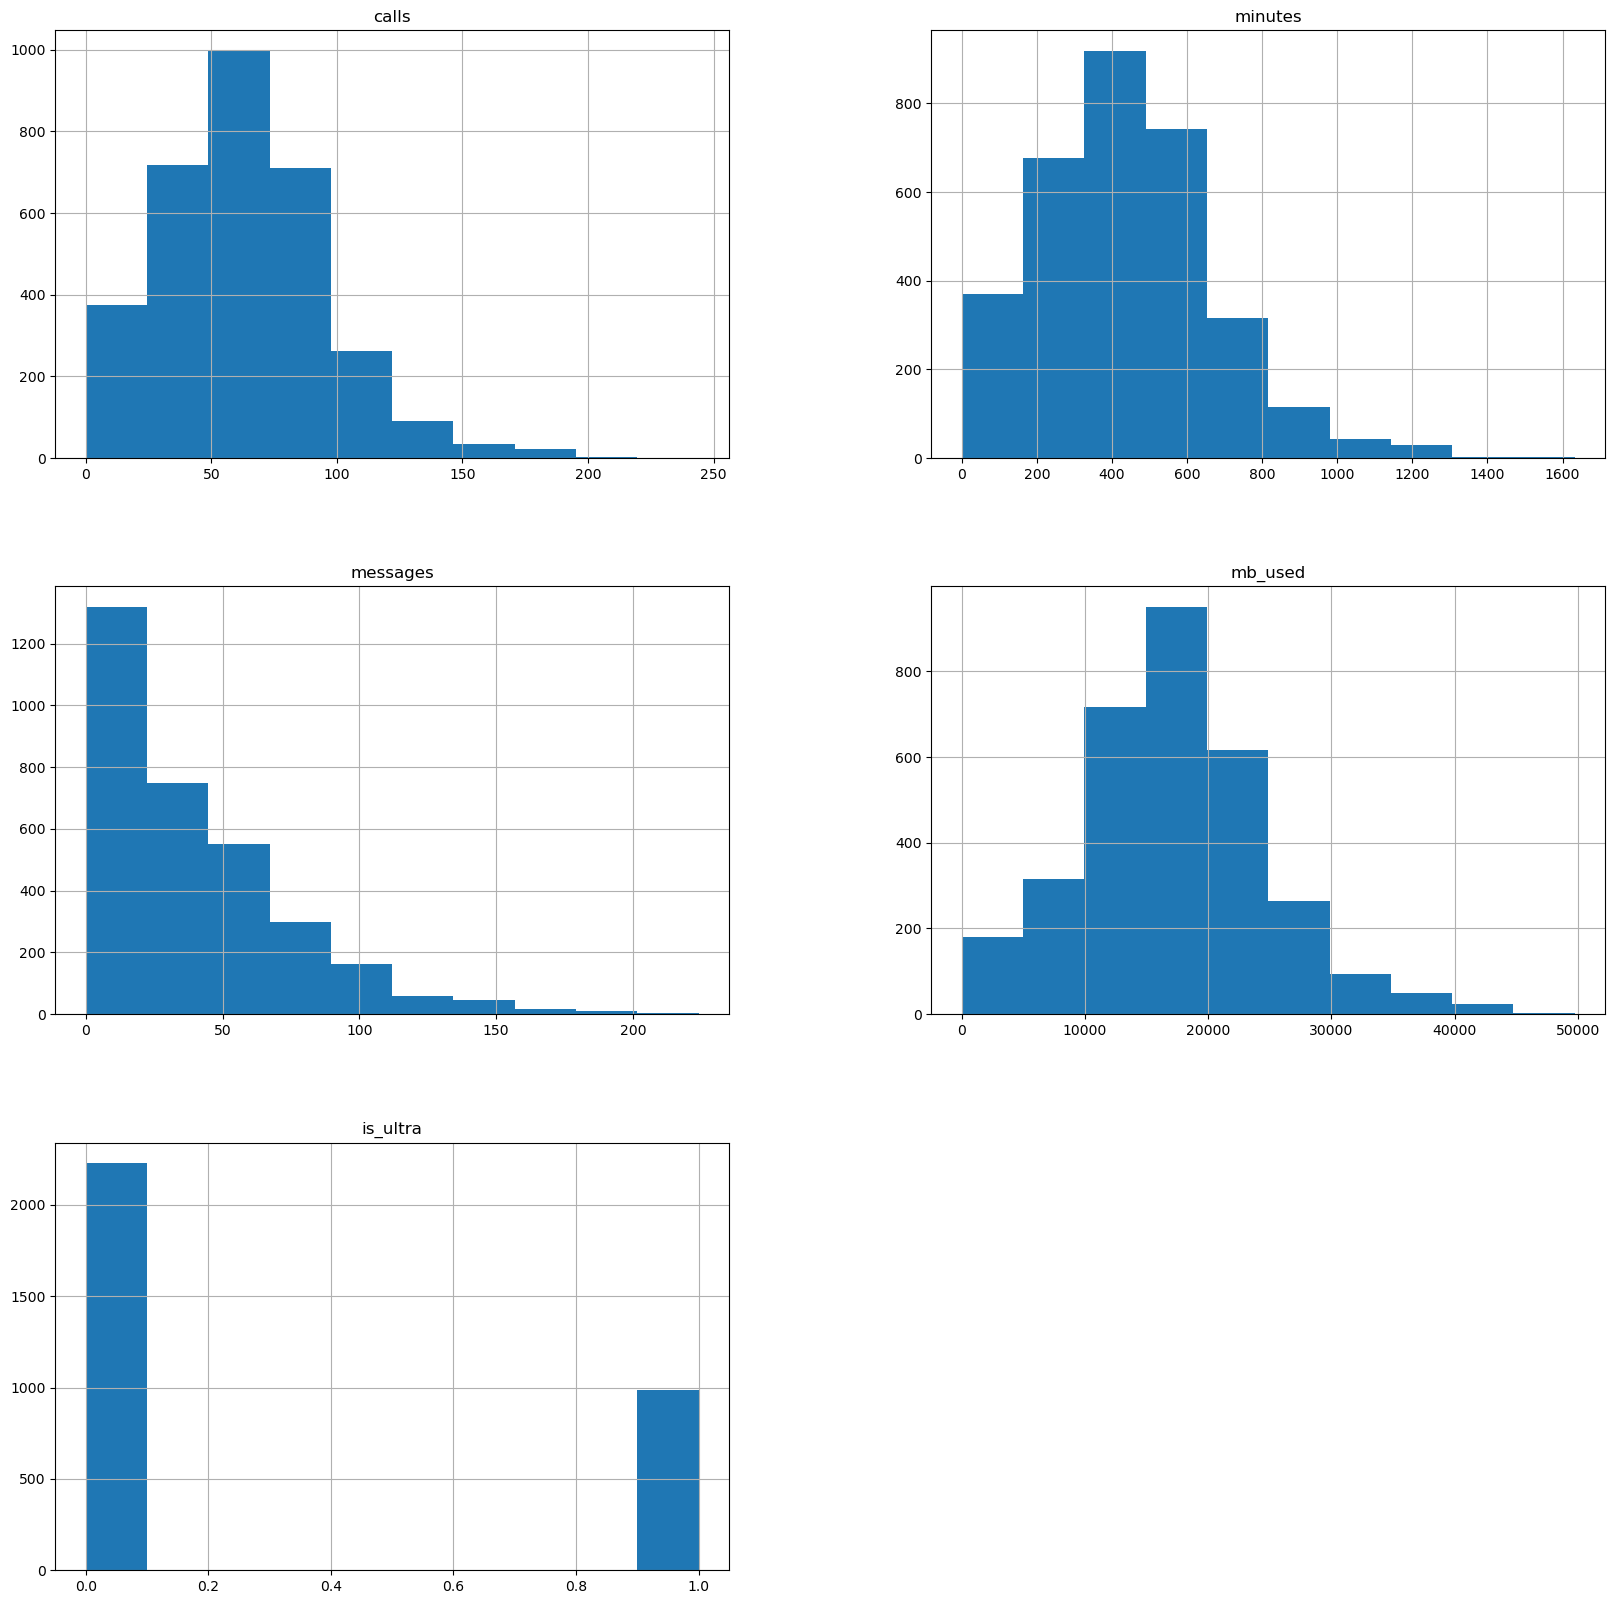

In [5]:
#построим графики для столбцов 
data.hist(figsize=(20,20))

array([<Axes: ylabel='is_ultra'>], dtype=object)

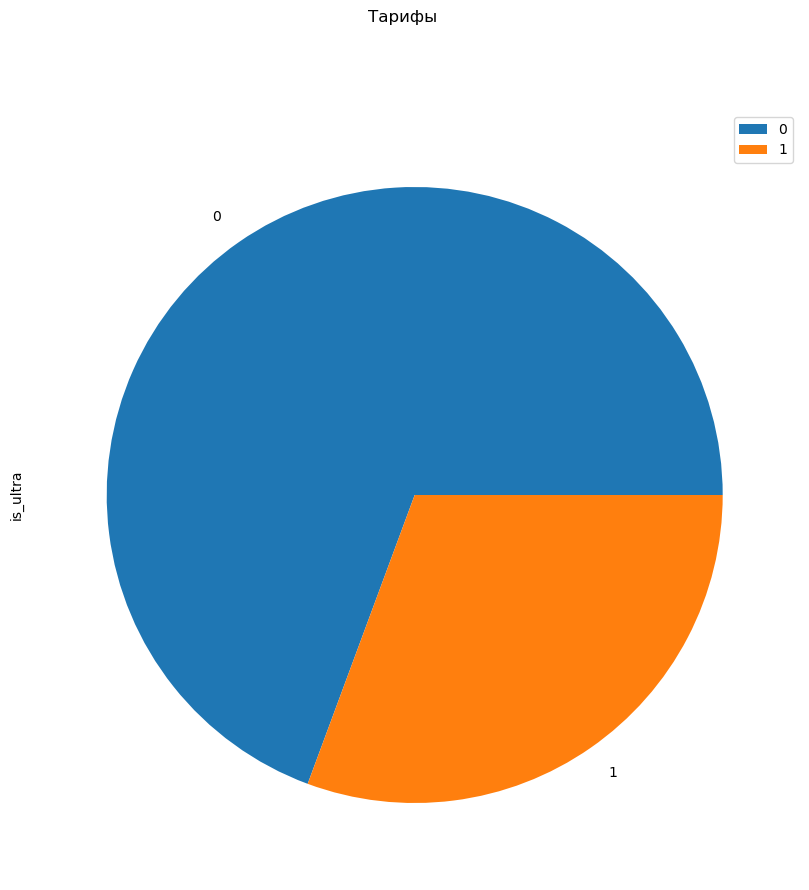

In [6]:
# для столбца с тарифами потроим круговую диаграмму
data.groupby('is_ultra').agg({'is_ultra':'count'}).plot(kind='pie',subplots=True, figsize=(10,10), title='Тарифы')

In [7]:
#посмотрим пропуски
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [8]:
# проверим названия столбцов
data.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

Вывод: данные были загружены, мы посмотрели общую информацию о данных, какие есть данные, посмотрели, есть ли пропуски, проверили названия столбцов, посмотрели в гистаграммах, как распределены данные, построили круговую диаграмму для тарифов.

## Разбейте данные на выборки

In [9]:
#разобьем данные на выборки
from sklearn.model_selection import train_test_split
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']
#сначала отделим тестовую выборку, 20% для тестовой выборки
features_l_v, features_test, target_l_v, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345,stratify=target) 
#разделим на обучающую и валидационную выборку, 25% для валидационной выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345,stratify=target)

Вывод: сделали разделение данных, сначала отделили тестовые данные, чтобы модель на них не училась, и мы потом могли бы сделать проверку на них, после разделили выборку на обучающую и на валидационную.

In [10]:
#проверим размер выборок
print('Тестовая выборка:', features_test.shape, target_test.shape,
    'Обучающая выборка:', features_train.shape, target_train.shape,
    'Валидационная выборка:', features_valid.shape, target_valid.shape
     )

Тестовая выборка: (643, 4) (643,) Обучающая выборка: (2410, 4) (2410,) Валидационная выборка: (804, 4) (804,)


## Исследуйте модели

In [11]:
#построим дерево решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=12345)

model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("Accuracy модели на валидационной выборке:", accuracy_score(target_valid, predictions_valid))

Accuracy модели на валидационной выборке: 0.7325870646766169


In [12]:
#построим случайный лес (зададим количество деревьев от 1 до 10), выберем и сохраним лучшую модель
from sklearn.ensemble import RandomForestClassifier

best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model = model 
        best_result = result 

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

Accuracy наилучшей модели на валидационной выборке: 0.7985074626865671


In [13]:
#логистическая регрессия
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 

print("Accuracy модели на валидационной выборке:", accuracy_score(target_valid, predictions_valid))

Accuracy модели на валидационной выборке: 0.7412935323383084


Вывод: мы построили три разных модели, дерево решений, случайный лес, логистическую регрессию, самый лучший результат показал случайный лес, с ним поработаем дальше

In [14]:
# выполним задание: Исследуйте качество разных моделей, меняя гиперпараметры
# начнем с дерева решений, по умолчанию устновлен criterion gini, поменяем его
model = DecisionTreeClassifier(random_state=12345, criterion='entropy')

model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print(f"Accuracy модели на валидационной выборке: {accuracy_score(target_valid, predictions_valid)}.")

Accuracy модели на валидационной выборке: 0.7338308457711443.


In [15]:
#поменяем еще пару параметров, min_samples_split по умолчанию 2, попробуем 4, splitter по умолчанию best, поменяем на random
model = DecisionTreeClassifier(random_state=12345, criterion='entropy', min_samples_split=4, splitter='random' )

model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print(f"Accuracy модели на валидационной выборке: {accuracy_score(target_valid, predictions_valid)}.")

Accuracy модели на валидационной выборке: 0.7276119402985075.


In [16]:
#поработаем над случайным лесом
#criterion по умолчанию gini, попробуем entropy, может и здесь как в дереве решений увеличится точность
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, criterion='entropy') 
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model = model 
        best_result = result 

print(f"Accuracy наилучшей модели на валидационной выборке: {best_result}.")

Accuracy наилучшей модели на валидационной выборке: 0.7898009950248757.


In [17]:
#min_samples_leaf вместо 1 по умолчанию поставим 3 и попробуем гиперпараметр class_weight
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_leaf=3, class_weight='balanced') 
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid) 
    if result > best_result:
        best_model = model 
        best_result = result 

print(f"Accuracy наилучшей модели на валидационной выборке: {best_result}.")

Accuracy наилучшей модели на валидационной выборке: 0.7873134328358209.


In [18]:
# перейдем в логистической регрессии, поменяем значения параметров class_weight, solver, penalty
model = LogisticRegression(random_state=12345, solver='saga', max_iter=1000, penalty='l1', class_weight='balanced') 
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 

print(f"Accuracy модели на валидационной выборке: {accuracy_score(target_valid, predictions_valid)}.")

Accuracy модели на валидационной выборке: 0.31467661691542287.


D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Проверьте модель на тестовой выборке

In [19]:
#случайный лес показал наибольшую точность, проверим на тестовых данных эту модель
model = RandomForestClassifier(random_state=12345) 
model.fit(features_train, target_train)  
predictions_test = model.predict(features_test)
print("Accuracy модели на тестовой выборке:", accuracy_score(target_test, predictions_test))

Accuracy модели на тестовой выборке: 0.80248833592535


Вывод: проверили на тестовых данных модель соучайный лес, которая раньше показала лучший результат, на тестовых данных результат даже выше.

## (бонус) Проверьте модели на адекватность

In [20]:
#построим для проверки новую модель для проверки нашей модели
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy="most_frequent")
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
print("Accuracy модели на тестовой выборке:", accuracy_score(target_valid, predictions_valid))

Accuracy модели на тестовой выборке: 0.6940298507462687


Вывод: мы построили модель, пользующими простыми правилами для предсказаний, но наша модель получила большую точность, значит она адекватна.

Общий вывод: 1) мы изучили данные, проверили пропуски, названия столбцов, построили графики для данных, 2) мы провели разделение выборки на тестовую, обучающую и валидационную, 3) построили три разных модели, одна из которых показала больший результат, 4) проверили лучшую модель на тестовой выборке, 6) проверили адекватность модели, построив простенькую модель и определив, что точность нашей модели выше.